In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
power_values = pd.DataFrame({"P": [-5.01, -6.43, -7.9, -9.68]})

count_P1 = pd.read_csv("ex2/P1.txt", skiprows=9, delimiter="\t", index_col=False)
count_P2 = pd.read_csv("ex2/P2.txt", skiprows=9, delimiter="\t", index_col=False)
count_P3 = pd.read_csv("ex2/P3.txt", skiprows=9, delimiter="\t", index_col=False)
count_P4 = pd.read_csv("ex2/P4.txt", skiprows=9, delimiter="\t", index_col=False)

In [3]:
count_P1.drop(["T", "C1", "C2", "C3", "C6", "C7", "BC1", "BC2", "BC3", "BC7", "BC6"], axis=1, inplace=True)
count_P2.drop(["T", "C1", "C2", "C3", "C6", "C7", "BC1", "BC2", "BC3", "BC7", "BC6"], axis=1, inplace=True)
count_P3.drop(["T", "C1", "C2", "C3", "C6", "C7", "BC1", "BC2", "BC3", "BC7", "BC6"], axis=1, inplace=True)
count_P4.drop(["T", "C1", "C2", "C3", "C6", "C7", "BC1", "BC2", "BC3", "BC7", "BC6"], axis=1, inplace=True)

In [4]:
mean1 = pd.DataFrame(count_P1.mean())
mean2 = pd.DataFrame(count_P2.mean())
mean3 = pd.DataFrame(count_P3.mean())
mean4 = pd.DataFrame(count_P4.mean())

In [5]:
means = pd.concat([mean1, mean2, mean3, mean4], axis=1).transpose()
means.reset_index(drop=True, inplace=True)
means.rename(columns={'C4': 'C4_mean', 'C5': 'C5_mean', 'C8': 'C8_mean'}, inplace=True)

In [6]:
std1 = pd.DataFrame(count_P1.std())
std2 = pd.DataFrame(count_P2.std())
std3 = pd.DataFrame(count_P3.std())
std4 = pd.DataFrame(count_P4.std())

In [7]:
std = pd.concat([std1, std2, std3, std4], axis=1).transpose()
std.reset_index(drop=True, inplace=True)
std.rename(columns={'C4': 'C4_std', 'C5': 'C5_std', 'C8': 'C8_std'}, inplace=True)

In [8]:
std.drop(['BC4', 'BC5', 'BC8', 'IT'], axis=1, inplace=True)

In [9]:
data = pd.concat([power_values, std, means], axis=1)

In [10]:
def dbm_to_watts(P):

    return 0.001 * 10**(P/10)

In [11]:
data['P'] = data['P'].apply(dbm_to_watts)
data.head()

,P,C4_std,C5_std,C8_std,C4_mean,C5_mean,C8_mean,BC4,BC5,BC8,IT
0,315.500462,4.425491,21.181213,109.758142,32.055556,428.055556,9746.444444,18.9,28.8,22.725,10000.0
1,227.509743,3.545621,16.137209,100.865445,27.000000,280.466667,5597.533333,18.9,28.8,22.725,10000.0
2,162.181010,3.910769,31.018021,298.692423,23.333333,193.666667,4427.111111,18.9,28.8,22.725,10000.0
3,107.646521,3.925497,8.688800,68.689779,22.533333,168.933333,4101.000000,18.9,28.8,22.725,10000.0


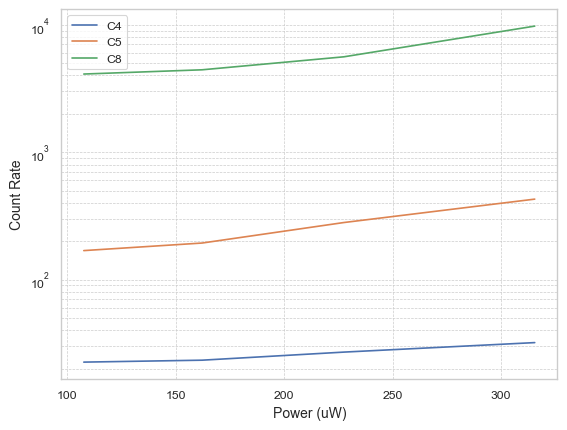

In [18]:
# plt.figure(dpi=300, figsize=(3, 2))
plt.plot(data['P'], data['C4_mean'], label='C4')
plt.plot(data['P'], data['C5_mean'], label='C5')
plt.plot(data['P'], data['C8_mean'], label='C8')
plt.xlabel('Power (uW)', fontsize=10)
plt.ylabel('Count Rate', fontsize=10)
plt.legend(loc='best')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.yscale('log')
plt.savefig('power_vs_count.png', dpi=300) 
plt.show()

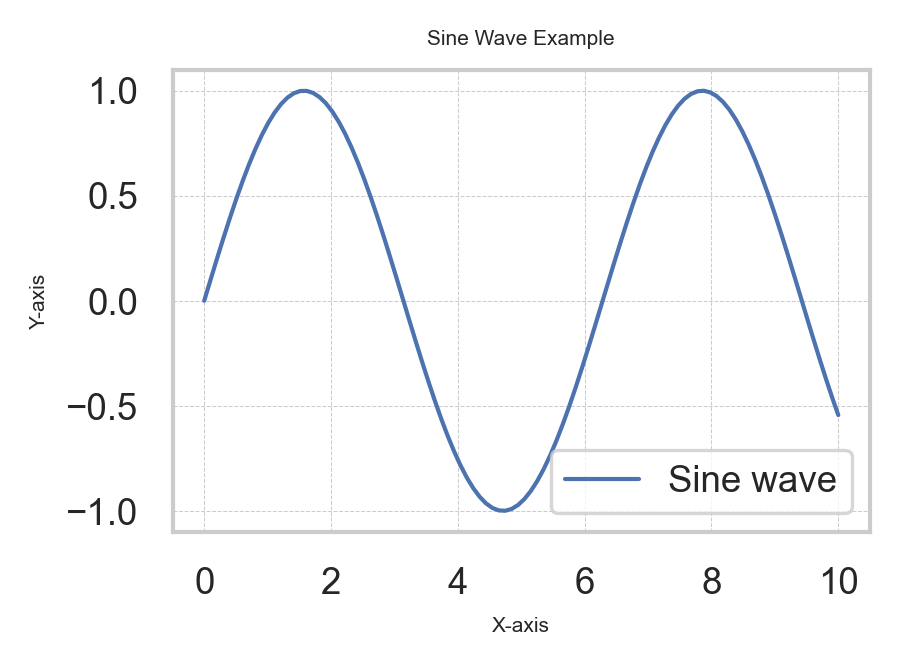

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Sample data
x = np.linspace(0, 10, 100)
y = np.sin(x)

# Set style and context
sns.set(style="whitegrid", context="paper")

# Create figure with higher DPI and size
plt.figure(dpi=300, figsize=(3, 2))

# Plot with grid and labels
plt.plot(x, y, label='Sine wave', color='b', linewidth=1)
plt.grid(True, which='both', linestyle='--', linewidth=0.25)
plt.xlabel('X-axis', fontsize=5)
plt.ylabel('Y-axis', fontsize=5)
plt.title('Sine Wave Example', fontsize=5)
plt.legend(loc='best')

# Save the figure in high-quality PDF format
plt.savefig('sine_wave.pdf', format='pdf')

# Show plot
plt.show()
